# MIT | Intro to Computational Thinking and Data Science

## Week 1 Lecture Code

## Section 1: Plotting with Pylab

In [9]:
import pylab
import numpy as np

In [6]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


this line forces **pylab** to plot inline but you loose control over the format. 

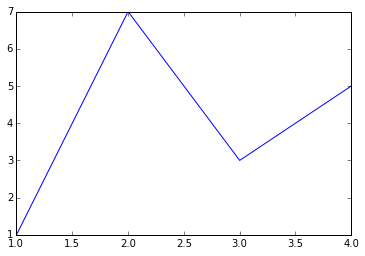

In [5]:
pylab.figure(1) # make figure 1 the current figure
pylab.plot([1,2,3,4], [1,7,3,5]) # draw on figure 1
pylab.show() # show figure on screen

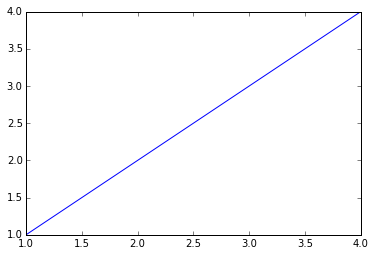

In [17]:
pylab.figure(1) #create figure 1
pylab.plot([1,2,3,4], [1,2,3,4]) #draw on figure 1

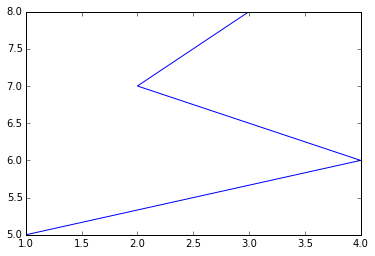

In [18]:
pylab.figure(2) #create figure 2
pylab.plot([1,4,2,3], [5,6,7,8]) #draw on figure 2

Use the key words in an assignment fashion and a default value allow you to write better function. 

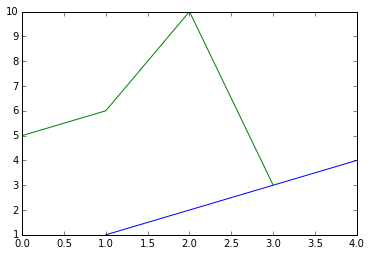

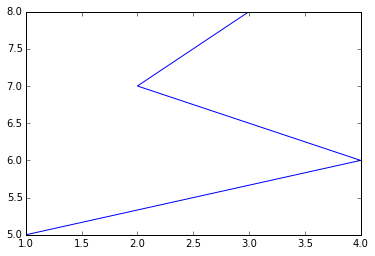

In [16]:
import pylab

pylab.figure(1) #create figure 1
pylab.plot([1,2,3,4], [1,2,3,4]) #draw on figure 1
pylab.figure(2) #create figure 2
pylab.plot([1,4,2,3], [5,6,7,8]) #draw on figure 2
pylab.savefig('Figure-Eric') #save figure 2
pylab.figure(1) #go back to working on figure 1
pylab.plot([5,6,10,3]) #draw again on figure 1
pylab.savefig('Figure-Grimson') #save figure 1

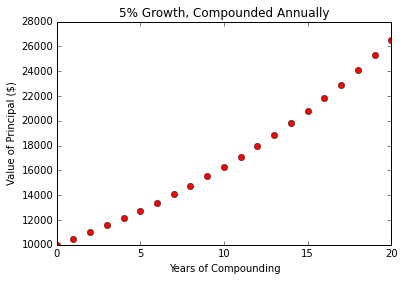

In [14]:
# Second Example (comment the above code before uncommiting this example) 

# Un-Comment is ctrl + / on my mac

principal = 10000 #initial investment
interestRate = 0.05
years = 20
values = []
for i in range(years + 1):
   values.append(principal)
   principal += principal*interestRate
pylab.plot(range(years+1), values, 'ro', linewidth = 2) # color has to follow the value. 
pylab.title('5% Growth, Compounded Annually')
pylab.xlabel('Years of Compounding')
pylab.ylabel('Value of Principal ($)')
pylab.show()

***

### L1 PROBLEM 3

In this problem and the next, we will explore how to make sense of a collection of data by first **parsing** the data, and then producing a meaningful plot that visually explains what the raw numbers say.

The file ``julyTemps.txt`` contains the daily maximum and minimum temperatures for each day in Boston for the 31 days of July 2012. Open the file in a text editor and look at how it is formatted. The goal of this exercise is to produce a plot that shows the difference between the high and the low temperature for each day.

First, we will write a function to load the data out of this file (for a review of file loading and processing, see Problem Set 1 - Review of IO. You may also wish to read up on the Python docs on file objects, particularly how to read multiple lines in a file).

In [2]:
def loadFile():
    inFile = open('julyTemps.txt')
    high = []
    low = []
    for line in inFile:
        fields = line.split()
        if len(fields) != 3 or 'Boston' == fields[0] or 'Day' == fields[0]:
            continue
        else:
            high.append(int(fields[1]))
            low.append(int(fields[2]))
    return (low, high)

Or we can do:

In [4]:
def loadFile_2(dir): # add directory as input
    inFile = open(dir)
    high = []
    low = []
    for line in inFile:
        fields = line.split()
        if len(fields) < 3 or not fields[0].isdigit(): # capture the non-relevant data
            continue
        else:
            high.append(int(fields[1]))
            low.append(int(fields[2]))
    return (low, high) # return as a tuple

### L1 PROBLEM 4

Now for the plotting function! In pylab, the plot function takes in two equal sized lists and uses the first list as a list of the x-coordinates and the second list as a list of the y-coordinates.

In [12]:
temp = loadFile()

manipulate the list 'temp' to generate the difference between the high low temperture using numpy. 

In [13]:
diffTemps = list(np.array(temp[0]) - np.array(temp[1]))

In [17]:
# complete the plot function:

def producePlot(lowTemps, highTemps):
    diffTemps = list(np.array(highTemps) - np.array(lowTemps))
    pylab.plot(range(1,32), diffTemps)
    pylab.title('Day by Day Ranges in Temperature in Boston in July 2012')
    pylab.xlabel('Days')
    pylab.ylabel('Temperature Ranges')
    pylab.show()

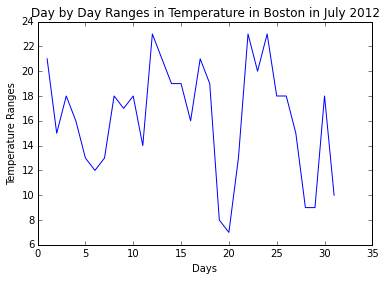

In [18]:
# use the function

(low, high) = loadFile()    
producePlot(low, high)

### PLOTTING MORTGAGES

In [19]:
import pylab

#set line width
pylab.rcParams['lines.linewidth'] = 6
#set font size for titles 
pylab.rcParams['axes.titlesize'] = 20
#set font size for labels on axes
pylab.rcParams['axes.labelsize'] = 20
#set size of numbers on x-axis
pylab.rcParams['xtick.major.size'] = 5
#set size of numbers on y-axis
pylab.rcParams['ytick.major.size'] = 5

In [20]:
def findPayment(loan, r, m):
    """Assumes: loan and r are floats, m an int
    Returns the monthly payment for a mortgage of size
    loan at a monthly rate of r for m months"""
    return loan*((r*(1+r)**m)/((1+r)**m - 1))

class MortgagePlots(object):
    
    def plotPayments(self, style):
        pylab.plot(self.paid[1:], style, label = self.legend)
        
    def plotTotPd(self, style):
        totPd = [self.paid[0]]
        for i in range(1, len(self.paid)):
            totPd.append(totPd[-1] + self.paid[i])
        pylab.plot(totPd, style, label = self.legend)

In [21]:
class Mortgage(MortgagePlots, object):
    """Abstract class for building different kinds of mortgages"""
    def __init__(self, loan, annRate, months):
        """Create a new mortgage"""
        self.loan = loan
        self.rate = annRate/12.0
        self.months = months
        self.paid = [0.0]
        self.owed = [loan]
        self.payment = findPayment(loan, self.rate, months)
        self.legend = None #description of mortgage

    def makePayment(self):
        """Make a payment"""
        self.paid.append(self.payment)
        reduction = self.payment - self.owed[-1]*self.rate
        self.owed.append(self.owed[-1] - reduction)

    def getTotalPaid(self):
        """Return the total amount paid so far"""
        return sum(self.paid)

    def __str__(self):
        return self.legend

In [22]:
# fixed-rate mortgage
class Fixed(Mortgage):
    def __init__(self, loan, r, months):
        Mortgage.__init__(self, loan, r, months)
        self.legend = 'Fixed, ' + str(r*100) + '%'

# fixed-rate mortgage with up-front points
class FixedWithPts(Fixed):
    def __init__(self, loan, r, months, pts):
        Fixed.__init__(self, loan, r, months)
        self.pts = pts
        self.paid = [loan*(pts/100.0)]
        self.legend += ', ' + str(pts) + ' points'

# mortgage that changes interest rate after 48 months
class TwoRate(Mortgage):
    def __init__(self,loan,r,months,teaserRate,teaserMonths):
        Mortgage.__init__(self, loan, teaserRate, months)
        self.teaserMonths = teaserMonths
        self.teaserRate = teaserRate
        self.nextRate = r/12.0
        self.legend = str(teaserRate*100)\
            + '% for ' + str(self.teaserMonths)\
            + ' months, then ' + str(r*100) + '%'

    def makePayment(self):
        if len(self.paid) == self.teaserMonths + 1:
            self.rate = self.nextRate
            self.payment = findPayment(self.owed[-1], self.rate,
                                       self.months - \
                                       self.teaserMonths)
        Mortgage.makePayment(self)

In [23]:
class MortgagePlots(object):
    
    def plotPayments(self, style):
        pylab.plot(self.paid[1:], style, label = self.legend)
        
    def plotTotPd(self, style):
        totPd = [self.paid[0]]
        for i in range(1, len(self.paid)):
            totPd.append(totPd[-1] + self.paid[i])
        pylab.plot(totPd, style, label = self.legend)

In [24]:
def plotMortgages(morts, amt):
    styles = ['b-', 'r-.', 'g:']
    payments = 0 #number to identify a figure
    cost = 1 #number to identify a figure
    pylab.figure(payments)
    pylab.title('Monthly Payments of Different $' + str(amt)
                + ' Mortgages')
    pylab.xlabel('Months')
    pylab.ylabel('Monthly Payments')
    pylab.figure(cost)
    pylab.title('Cost of Different $' + str(amt) + ' Mortgages')
    pylab.xlabel('Months')
    pylab.ylabel('Total Payments')
    for i in range(len(morts)):
        pylab.figure(payments)
        morts[i].plotPayments(styles[i])
        pylab.figure(cost)
        morts[i].plotTotPd(styles[i])
    pylab.figure(payments)
    pylab.legend(loc = 'upper center')
    pylab.figure(cost)
    pylab.legend(loc = 'best')

In [25]:
def compareMortgages(amt, years, fixedRate, pts, ptsRate,
                    varRate1, varRate2, varMonths):
    totMonths = years*12
    fixed1 = Fixed(amt, fixedRate, totMonths)
    fixed2 = FixedWithPts(amt, ptsRate, totMonths, pts)
    twoRate = TwoRate(amt, varRate2, totMonths,
                      varRate1, varMonths)
    morts = [fixed1, fixed2, twoRate]
    for m in range(totMonths):
        for mort in morts:
            mort.makePayment()
    plotMortgages(morts, amt)

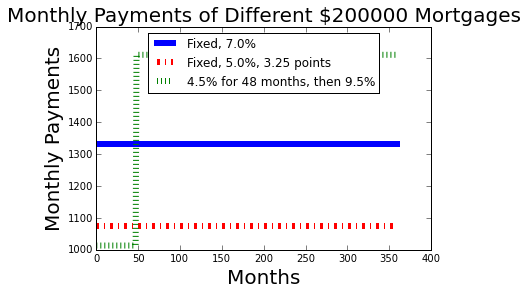

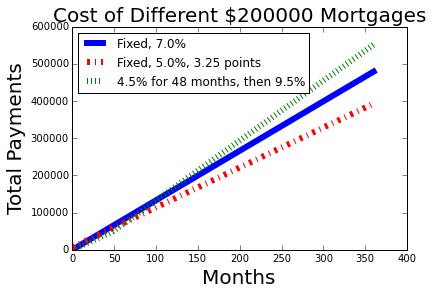

In [26]:
## use the plots

compareMortgages(amt=200000, years=30, fixedRate=0.07,
                 pts = 3.25, ptsRate=0.05, varRate1=0.045,
                 varRate2=0.095, varMonths=48)

pylab.show()

## Section 2: Simulation and Random Walks

### L2 PROBLEM 2

**Using the random module**

This problem asks you to write a short function that uses the the random module. Click on the above link to be taken to the Python docs on the random module, where you can see all sorts of cool functions the module provides.

The random module has many useful functions - play around with them in your interpreter to see how much you can do! To test this code yourself, put the line import random at the top of your code file, to import all of the functions in the random module. To call random module methods, preface them with random., as in this sample interpreter session:

In [5]:
import random
random.randint(1, 5)

4

In [8]:
random.choice(['apple', 'banana', 'cat'])

'banana'

How would you randomly generate an even number x, 0 <= x < 100? Fill out the definition for the function genEven(). Please generate a uniform distribution over the even numbers between 0 and 100 (not including 100).

In [9]:
def genEven():
    return random.randrange(0, 100, 2) # using the step function. 

def genEven():
    return random.choice(range(0, 100, 2))

def genEven():
    return int(random.random() * 50)*2

### L2 PROBLEM 3A

Write a deterministic program, deterministicNumber, that returns an even number between 9 and 21.

In [10]:
import random
def deterministicNumber():
    '''
    Deterministically generates and returns an even number between 9 and 21
    '''
    random.seed(0) # This will be discussed in the video "Drunken Simulations"
    return 2 * random.randint(5, 10)

In [12]:
deterministicNumber()

20

Write a uniformly distributed stochastic program, stochasticNumber, that returns an even number between 9 and 21.

Fancy name for random number generator. 

In [14]:
def stochasticNumber():
    return random.randrange(10, 22, 2)

### DRUNKEN TESTS

#### Define a class: Location

In [43]:
class Location(object):
    
    def __init__(self, x, y):
        """x and y are floats"""
        self.x = x
        self.y = y
        
    def move(self, deltaX, deltaY):
        """deltaX and deltaY are floats"""
        return Location(self.x + deltaX, self.y + deltaY)
    
    def getX(self):
        return self.x
    
    def getY(self):
        return self.y
    
    def distFrom(self, other):
        ox = other.x
        oy = other.y
        xDist = self.x - ox
        yDist = self.y - oy
        return (xDist**2 + yDist**2)**0.5
    
    def __str__(self):
        return '<' + str(self.x) + ', ' + str(self.y) + '>'

#### Define a class: Field

In [44]:
class Field(object):
    
    def __init__(self):
        self.drunks = {}
        
    def addDrunk(self, drunk, loc):
        if drunk in self.drunks:
            raise ValueError('Duplicate drunk')
        else:
            self.drunks[drunk] = loc
            
    def moveDrunk(self, drunk):
        if not drunk in self.drunks:
            raise ValueError('Drunk not in field')
        xDist, yDist = drunk.takeStep()
        currentLocation = self.drunks[drunk]
        #use move method of Location to get new location
        self.drunks[drunk] = currentLocation.move(xDist, yDist)
        
    def getLoc(self, drunk):
        if not drunk in self.drunks:
            raise ValueError('Drunk not in field')
        return self.drunks[drunk]

#### Start Our Drunk Test

In [45]:
import random

class Drunk(object):
    def __init__(self, name):
        self.name = name
    def __str__(self):
        return 'This drunk is named ' + self.name
    
class UsualDrunk(Drunk):
    def takeStep(self):
        stepChoices =\
            [(0.0,1.0), (0.0,-1.0), (1.0, 0.0), (-1.0, 0.0)]
        return random.choice(stepChoices)
    
def walk(f, d, numSteps):
    start = f.getLoc(d)
    for s in range(numSteps):
        f.moveDrunk(d)
    return(start.distFrom(f.getLoc(d)))


def simWalks(numSteps, numTrials):
    homer = UsualDrunk('Homer')
    origin = Location(0, 0)
    distances = []
    for t in range(numTrials):
        f = Field()
        f.addDrunk(homer, origin)
        distances.append(walk(f, homer, numSteps))
    return distances


def drunkTest(numTrials = 20):
    
    #random.seed(0) # this means no randomness. 
    
    for numSteps in [10, 100, 1000, 10000]:
    #for numSteps in [0,1] # debug the code 
        distances = simWalks(numSteps, numTrials)
        print 'Random walk of ' + str(numSteps) + ' steps'
        print ' Mean =', sum(distances)/len(distances)
        print ' Max =', max(distances), 'Min =', min(distances)

In [46]:
drunkTest()

Random walk of 10 steps
 Mean = 2.9889404799
 Max = 5.09901951359 Min = 0.0
Random walk of 100 steps
 Mean = 8.65575888044
 Max = 15.2315462117 Min = 2.0
Random walk of 1000 steps
 Mean = 27.2219897267
 Max = 50.5964425627 Min = 1.41421356237
Random walk of 10000 steps
 Mean = 88.9603300359
 Max = 199.449241663 Min = 8.94427191


### Ploting the Drunk Walk

In [47]:
import pylab

In [53]:
import mpld3
mpld3.enable_notebook() #this line from mpld3 is suppose to enable you zooming in the notebook

# mpld3.disable_notebook() # this is how you disable the mpld3

In [48]:
def drunkTestP(numTrials = 50):
    stepsTaken = [10, 100, 1000, 10000]
    meanDistances = []
    for numSteps in stepsTaken:
        distances = simWalks(numSteps, numTrials)
        meanDistances.append(sum(distances)/len(distances))
    pylab.plot(stepsTaken, meanDistances)
    pylab.title('Mean Distance from Origin')
    pylab.xlabel('Steps Taken')
    pylab.ylabel('Steps from Origin')
    pylab.show()

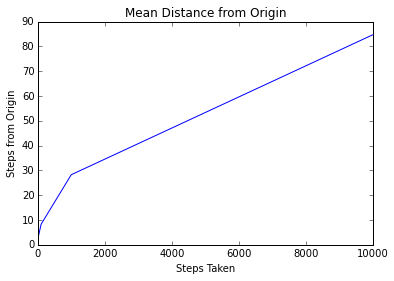

In [54]:
drunkTestP()

In [50]:
def drunkTestP1(numTrials = 50):
    stepsTaken = [10, 100, 1000, 10000]
    meanDistances = []
    squareRootOfSteps = []
    for numSteps in stepsTaken:
        distances = simWalks(numSteps, numTrials)
        meanDistances.append(sum(distances)/len(distances))
        squareRootOfSteps.append(numSteps**0.5)
    pylab.plot(stepsTaken, meanDistances, 'b-',
               label = 'Mean distance')
    pylab.plot(stepsTaken, squareRootOfSteps, 'g-.',
               label = 'Square root of steps')
    pylab.title('Mean Distance from Origin')
    pylab.xlabel('Steps Taken')
    pylab.ylabel('Steps from Origin')
    pylab.legend()
    pylab.show()

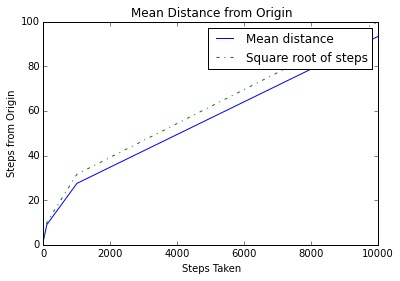

In [55]:
drunkTestP1()

In [56]:
#Look at different kinds of drunks

class UsualDrunk(Drunk):
    def takeStep(self):
        stepChoices =\
            [(0.0,1.0), (0.0,-1.0), (1.0, 0.0), (-1.0, 0.0)]
        return random.choice(stepChoices)

class ColdDrunk(Drunk):
    def takeStep(self):
        stepChoices =\
            [(0.0,0.95), (0.0,-1.0), (1.0, 0.0), (-1.0, 0.0)]
        return random.choice(stepChoices)

class EDrunk(Drunk):
    def takeStep(self):
        deltaX = random.random()
        if random.random() < 0.5:
            deltaX = -deltaX
        deltaY = random.random()
        if random.random() < 0.5:
            deltaY = -deltaY
        return (deltaX, deltaY)

In [62]:
# New version of simWalks

def simWalks(numSteps, numTrials, dClass):
    homer = dClass('Homer')
    origin = Location(0, 0)
    distances = []
    for t in range(numTrials):
        f = Field()
        f.addDrunk(homer, origin)
        distances.append(walk(f, homer, numSteps))
    return distances


def drunkTestP(numTrials = 50):
    stepsTaken = [10, 100, 1000, 10000]
    for dClass in (UsualDrunk, ColdDrunk, EDrunk):
        meanDistances = []
        for numSteps in stepsTaken:
            distances = simWalks(numSteps, numTrials, dClass)
            meanDistances.append(sum(distances)/len(distances))
        pylab.plot(stepsTaken, meanDistances,
                   label = dClass.__name__) # generate the name
        pylab.title('Mean Distance from Origin')
        pylab.xlabel('Steps Taken')
        pylab.ylabel('Steps from Origin')
        pylab.legend(loc = 'upper left')
    pylab.show()

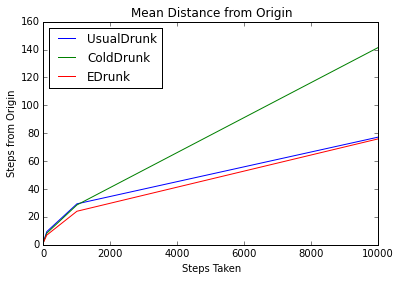

In [68]:
drunkTestP()

In [67]:
mpld3.disable_notebook()